In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [107]:
train = pd.read_csv('../titanic/train.csv')

In [108]:
test = pd.read_csv('../titanic/test.csv')

In [109]:
train.set_index('PassengerId', inplace=True)

In [110]:
test.set_index('PassengerId', inplace=True)

In [111]:
test['Survived'] = np.nan

In [112]:
data = pd.concat([train, test], sort=False)

In [113]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [114]:
data.columns= ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuge', 'PaisFilhos', 'Bilhete',
       'Tarifa', 'Cabine', 'Embarque']

In [115]:
data['Sexo'].map({'male': 'homem', 'female': 'mulher'})

PassengerId
1        homem
2       mulher
3       mulher
4       mulher
5        homem
         ...  
1305     homem
1306    mulher
1307     homem
1308     homem
1309     homem
Name: Sexo, Length: 1309, dtype: object

In [116]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

In [117]:
data.drop('Cabine', axis=1, inplace=True)

In [118]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

In [119]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [120]:
modaembarque = data['Embarque'].mode()[0]

In [121]:
data['Embarque'].fillna(modaembarque, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_13332\3417798170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarque'].fillna(modaembarque, inplace=True)


In [122]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

In [123]:
mediatarifa = data['Tarifa'].mean()

In [124]:
data['Tarifa'].fillna(mediatarifa, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_13332\3228854067.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Tarifa'].fillna(mediatarifa, inplace=True)


In [125]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

<Axes: >

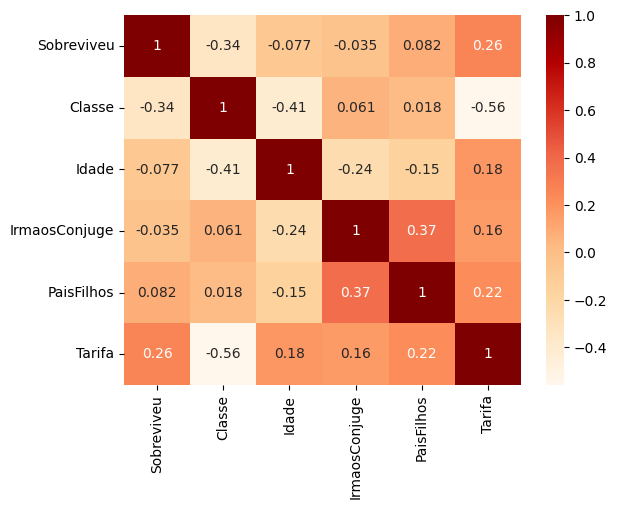

In [126]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='OrRd')

In [127]:
data.drop('Sobreviveu', axis=1, inplace=True)

In [128]:
data['Nome'].str.extract('([A-Za-z]+)\.')

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\pedro\AppData\Local\Temp\ipykernel_13332\176154817.py:1: SyntaxWarning: invalid escape sequence '\.'
  data['Nome'].str.extract('([A-Za-z]+)\.')


,0
PassengerId,
1,Mr
2,Mrs
3,Miss
4,Mrs
5,Mr
...,...
1305,Mr
1306,Dona
1307,Mr


In [129]:
data ['Titulo'] = data['Nome'].str.extract('([A-Za-z]+)\.')

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\pedro\AppData\Local\Temp\ipykernel_13332\1849601613.py:1: SyntaxWarning: invalid escape sequence '\.'
  data ['Titulo'] = data['Nome'].str.extract('([A-Za-z]+)\.')


In [130]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [131]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,female,male
Titulo,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [132]:
['Miss', 'Master','Mr','Mrs']

['Miss', 'Master', 'Mr', 'Mrs']

In [133]:
data ['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss', 'Master','Mr','Mrs'] else x)

In [134]:
titulos_traduzidos = {'Master':'Menino','Miss':'Solteira','Mr':'HomemAdulto','Mrs':'Casada'}

In [135]:
data ['Titulo'] = data['Titulo'].map(titulos_traduzidos)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Nome           1309 non-null   object 
 2   Sexo           1309 non-null   object 
 3   Idade          1046 non-null   float64
 4   IrmaosConjuge  1309 non-null   int64  
 5   PaisFilhos     1309 non-null   int64  
 6   Bilhete        1309 non-null   object 
 7   Tarifa         1309 non-null   float64
 8   Embarque       1309 non-null   object 
 9   Titulo         1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [137]:
data.drop(['Nome', 'Bilhete'], axis=1, inplace=True)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Sexo           1309 non-null   object 
 2   Idade          1046 non-null   float64
 3   IrmaosConjuge  1309 non-null   int64  
 4   PaisFilhos     1309 non-null   int64  
 5   Tarifa         1309 non-null   float64
 6   Embarque       1309 non-null   object 
 7   Titulo         1275 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [139]:
solteiras_com_pais = data.loc[(data['Titulo']=='Solteira')&(data['PaisFilhos']>=1)]

In [140]:
solteiras_com_pais['Idade'].mean()

np.float64(12.178815789473685)

(array([16., 11.,  3., 10.,  3.,  3., 11.,  2.,  8.,  4.,  1.,  1.,  0.,
         1.,  2.]),
 array([ 0.17      ,  2.75866667,  5.34733333,  7.936     , 10.52466667,
        13.11333333, 15.702     , 18.29066667, 20.87933333, 23.468     ,
        26.05666667, 28.64533333, 31.234     , 33.82266667, 36.41133333,
        39.        ]),
 <BarContainer object of 15 artists>)

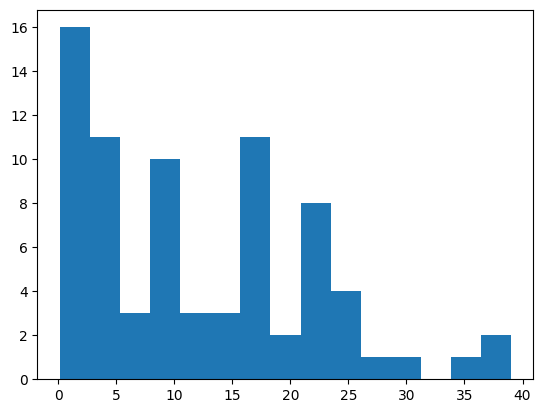

In [141]:
plt.hist(solteiras_com_pais['Idade'], bins=15)

In [142]:
data.loc[data['Titulo']=='Solteira']['Idade'].mean()

np.float64(21.774238095238097)

<function matplotlib.pyplot.show(close=None, block=None)>

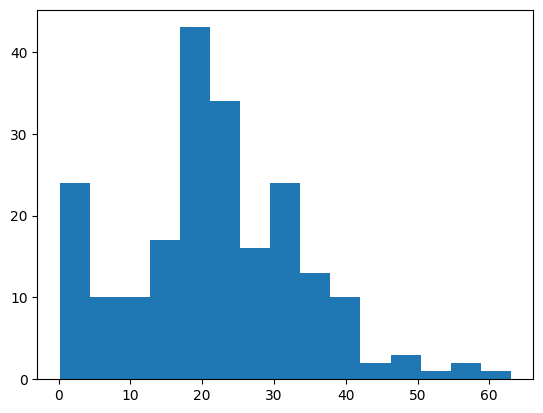

In [143]:
plt.hist(data.loc[data['Titulo']=='Solteira']['Idade'], bins=15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

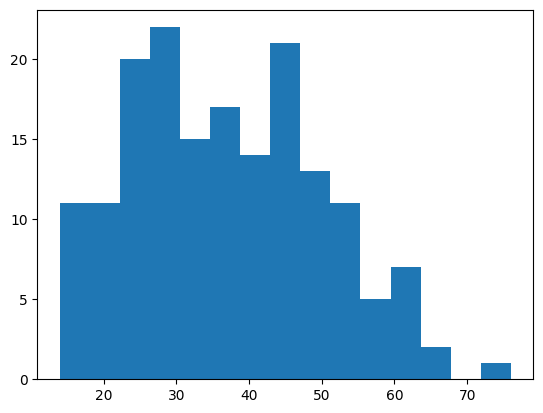

In [144]:
plt.hist(data.loc[data['Titulo']=='Casada']['Idade'], bins=15)
plt.show

In [145]:
solteiras_com_pais.index

Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,  173,
        181,  185,  206,  230,  234,  238,  298,  312,  319,  330,  342,  357,
        375,  382,  410,  418,  420,  436,  437,  447,  449,  470,  480,  486,
        531,  536,  540,  541,  542,  543,  581,  586,  594,  616,  619,  635,
        643,  645,  652,  690,  692,  703,  721,  743,  751,  793,  814,  836,
        853,  854,  864,  889,  918,  944,  945, 1009, 1017, 1032, 1067, 1078,
       1080, 1095, 1106, 1130, 1142, 1155, 1175, 1176, 1188, 1218, 1246, 1277,
       1294, 1301],
      dtype='int64', name='PassengerId')

In [146]:
data['solteiras_com_pais'] = 0

In [147]:
for idx, _ in data.iterrows():
    if idx in solteiras_com_pais.index:
        data['solteiras_com_pais'].at[idx] = 1

In [148]:
data['solteiras_com_pais'].value_counts()

solteiras_com_pais
0    1223
1      86
Name: count, dtype: int64

In [150]:
data['Sexo'] = data['Sexo'].map({'male': 0, 'female': 1})

In [153]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Titulo'], drop_first=True)

In [154]:
data.isnull().sum()

Sexo                    0
Idade                 263
IrmaosConjuge           0
PaisFilhos              0
Tarifa                  0
solteiras_com_pais      0
Classe_2                0
Classe_3                0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Solteira         0
dtype: int64

In [155]:
train_idade = data.dropna()

In [159]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade', axis=1)

In [160]:
test_idade

,Sexo,IrmaosConjuge,PaisFilhos,Tarifa,solteiras_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,
6,0,0,0,8.4583,0,False,True,True,False,True,False,False
18,0,0,0,13.0000,0,True,False,False,True,True,False,False
20,1,0,0,7.2250,0,False,True,False,False,False,False,False
27,0,0,0,7.2250,0,False,True,False,False,True,False,False
29,1,0,0,7.8792,0,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1,0,0,7.7208,0,False,True,True,False,False,False,True
1302,1,0,0,7.7500,0,False,True,True,False,False,False,True
1305,0,0,0,8.0500,0,False,True,False,True,True,False,False


In [161]:
train_idade.shape, test_idade.shape

((1046, 13), (263, 12))

In [163]:
X = train_idade.drop('Idade', axis=1)

In [164]:
y = train_idade['Idade']

In [165]:
X.shape, y.shape

((1046, 12), (1046,))

In [168]:
from sklearn import linear_model

In [169]:
lm = linear_model.LinearRegression()

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [172]:
lm.fit(X_train, y_train)

LinearRegression()

In [173]:
pred = lm.predict(X_test)
pred.shape

(314,)

In [174]:
from sklearn.metrics import mean_squared_error

In [175]:
lm.score(X_test, y_test)

0.48058769824322356

In [176]:
mse = mean_squared_error(y_test, pred)

In [178]:
rmse = np.sqrt(mse)
rmse

np.float64(10.36341734908139)

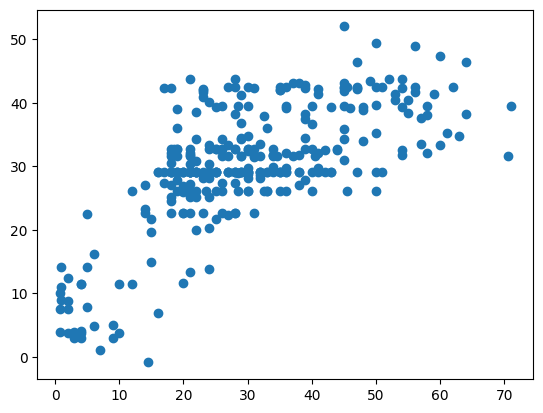

In [179]:
plt.scatter(y_test, pred)
plt.show()

In [182]:
pred_idade = lm.predict(test_idade)

In [185]:
test_idade['Idade'] = pred_idade

In [187]:
idade = pd.concat([train_idade, test_idade], sort=False)

In [189]:
idade.shape    

(1309, 13)

In [190]:
idade_completa = pd.DataFrame({'IdPassageiro': idade.index, 'Idade': idade['Idade']})

In [191]:
idade_completa

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1300,25.163780
1302,1302,25.163531
1305,1305,29.088798


In [192]:
idade_completa.to_csv('idade_completa.csv', index=False)